<a href="https://colab.research.google.com/github/Akashkc7/Akash-k-c/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CUSTOMER CHURN PREDICTION MODEL**

**Introduction:**

Customer churn is a critical challenge faced by businesses across various industries. It refers to the phenomenon where customers discontinue their engagement with a company's products or services. Churn prediction plays a pivotal role in customer relationship management as it enables businesses to identify potential churners and take proactive measures to retain them. This project aims to leverage machine learning techniques to predict customer churn and provide valuable insights to reduce attrition rates.

**Aim:**

The primary aim of this project is to develop an accurate and reliable customer churn prediction model that can assist businesses in:

Identifying At-Risk Customers: Identify customers who are at a high risk of churning based on their historical behavior and interactions with the business.

Proactive Retention: Implement retention strategies and interventions for at-risk customers to prevent them from leaving.

**CONTENTS**

Importing Libraries

Importing dataset

Data Wrangling

Exploratory Data Analysis

Encoding

Train,Test Split

Model Creation


**Importing Libraries**

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


**Importing The Dataset**

In [5]:
df=pd.read_csv('/content/drive/MyDrive/Customer churn/customer_churn_dataset-training-master.csv')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


**Data Wrangling**

In [8]:
df.shape

(440833, 12)

In [9]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [10]:
df.tail()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0
440832,449999.0,31.0,Male,48.0,20.0,1.0,14.0,Premium,Quarterly,567.77,21.0,0.0


In [11]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [12]:
df.dtypes

CustomerID           float64
Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [14]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


**Data** **Processing**

In [15]:
df.isna().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [16]:
df=df.dropna()
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [17]:
df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [18]:
df=df.drop(['CustomerID'],axis=1)
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [19]:
class_distribution = df['Churn'].value_counts()
print(class_distribution)

1.0    249999
0.0    190833
Name: Churn, dtype: int64


**EXPLORATORY DATA ANALYSIS**(EDA) is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization **methods**

In [20]:
numerical_features = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend','Last Interaction']



In [21]:
#plotting piechart

def make_piechart(df, target_feature, additional=''):
    # Count the occurrences of each category in the target feature
    value_counts = df[target_feature].value_counts()

    # Extracting the categories and their counts
    categories = value_counts.index
    counts = value_counts.values

    palette_color = sns.color_palette('bright')
    plt.pie(counts, labels=categories, colors=palette_color, autopct='%.0f%%', startangle=140)
    plt.title(f"Distribution of Customer's {target_feature} {additional}")
    plt.show()

    # Preparing a text summary of the distribution
    summary = f"Distribution of Customer's {target_feature.lower()} {additional}:\n"
    for category, count in zip(categories, counts):
        summary += f"{category}: {count}\n"

    print(summary)




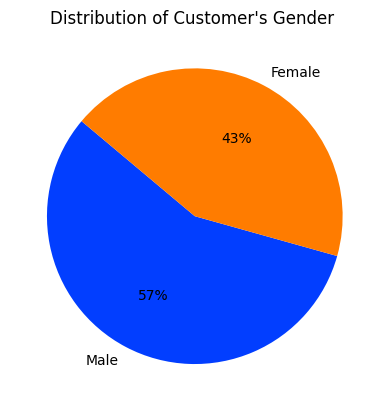

Distribution of Customer's gender :
Male: 250252
Female: 190580



In [22]:
make_piechart(df,'Gender')



*   **There are more male customers in the company.**




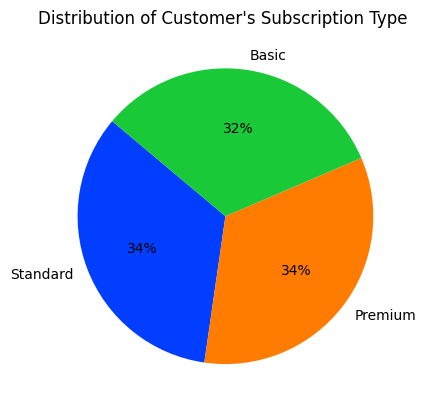

Distribution of Customer's subscription type :
Standard: 149128
Premium: 148678
Basic: 143026



In [23]:
make_piechart(df, 'Subscription Type')





*  **There is a close balance of customers among the three subscription types: Standard, Premium, and Basic**


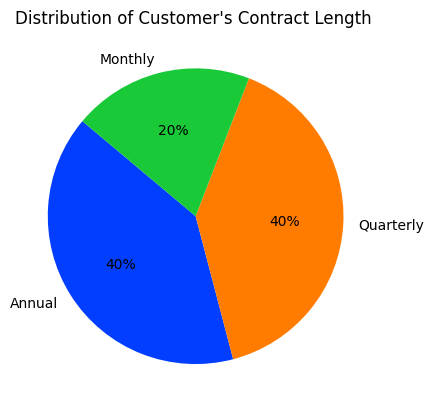

Distribution of Customer's contract length :
Annual: 177198
Quarterly: 176530
Monthly: 87104



In [24]:
make_piechart(df, 'Contract Length')



*   **Annual contracts and quarterly contracts have similar and the highest number of customers counts, followed by monthly contracts with the lowest customers.**




In [25]:
g_labels = ['Male', 'Female']
c_labels = [1, 0]
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['Gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

# `hole` to create a donut-like pie chart
fig.update_traces(hole=.6, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.20, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.80, y=0.5, font_size=20, showarrow=False)])
fig.show()



     
  

*   **56.7 % of customers switched to another firm.**
*   **Customers are 43.2 % female and 56.8 % male.**





In [26]:


def make_barplot(df, target_feature, custom_ticks=None, unit='', additional=''):
    plt.figure(figsize=(10, 5))
    dict_of_val_counts = dict(df[target_feature].value_counts())
    data = list(dict_of_val_counts.values())
    keys = list(dict_of_val_counts.keys())
    plt.bar(keys, data)
    if custom_ticks is not None:
        plt.xticks(custom_ticks)
    plt.xlabel(f'{target_feature.capitalize()}{additional}')
    plt.ylabel('Frequency')
    plt.title(f"Distribution of Customer's {target_feature.lower()}{additional}\n")
    plt.grid(axis='y')
    plt.show()
    print(f"Distribution of Customer's {target_feature.lower()}{additional}: {df[target_feature].mean():.2f} ± {df[target_feature].median():.2f} {unit}\nMedian: {df[target_feature].median():.2f} {unit}\nMinimum: {df[target_feature].min()} {unit}\nMaximum: {df[target_feature].max()} {unit}\n\n{df[target_feature].skew():.3f} Skewness\n")







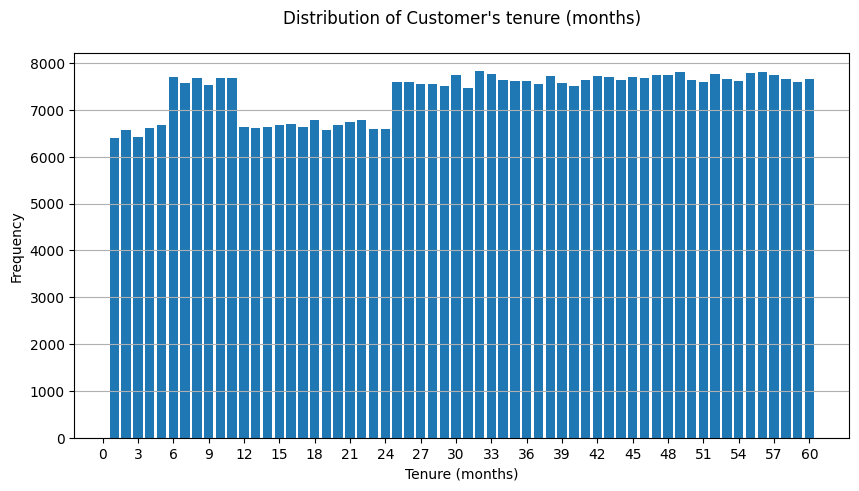

Distribution of Customer's tenure (months): 31.26 ± 32.00 months
Median: 32.00 months
Minimum: 1.0 months
Maximum: 60.0 months

-0.061 Skewness



In [27]:
make_barplot(df, 'Tenure', custom_ticks=np.arange(0, 61, 3), additional=' (months)', unit='months')





*   **Customers typically stay with the company for longer periods. However, more customers tend to leave within the first 1-5 months and between the 12-24 month tenure periods**




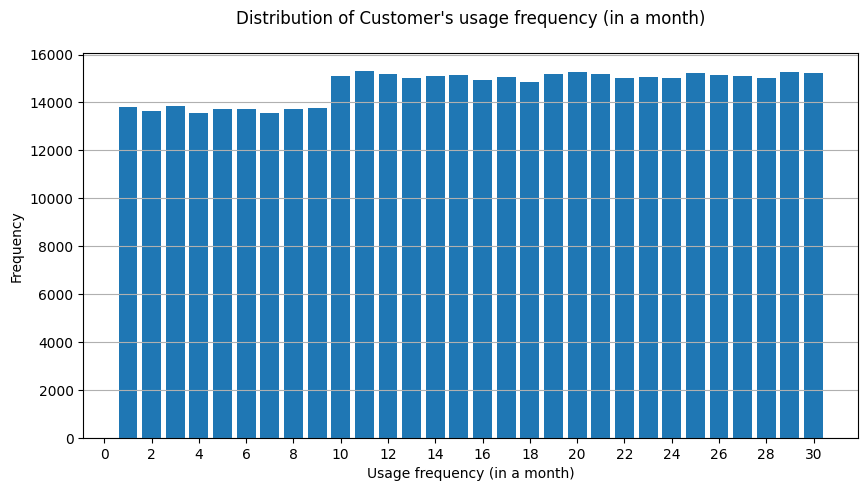

Distribution of Customer's usage frequency (in a month): 15.81 ± 16.00 times
Median: 16.00 times
Minimum: 1.0 times
Maximum: 30.0 times

-0.043 Skewness



In [28]:
make_barplot(df, 'Usage Frequency', custom_ticks=np.arange(0, 31, 2), unit='times', additional=' (in a month)')



*   **On average, customers use the company's services about 16 times each month. But, some people use the services a lot more, while others use them much less. This shows that different customers have very different habits when it comes to using the company's services**




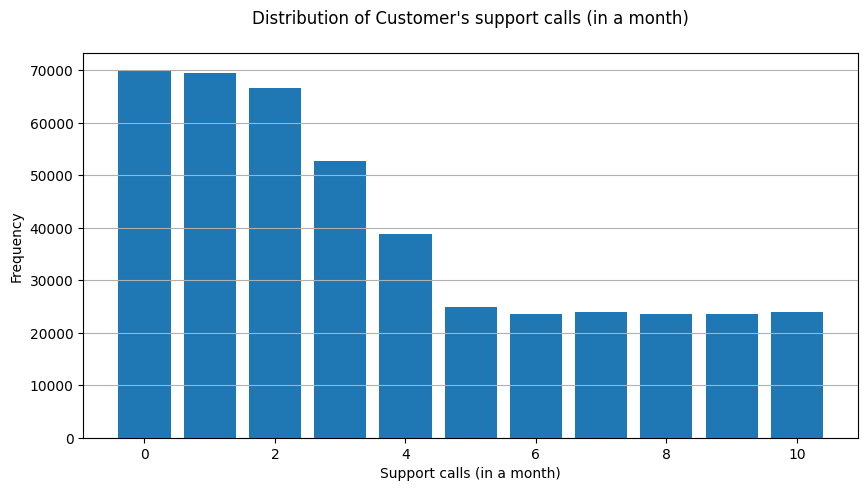

Distribution of Customer's support calls (in a month): 3.60 ± 3.00 calls
Median: 3.00 calls
Minimum: 0.0 calls
Maximum: 10.0 calls

0.667 Skewness



In [29]:
make_barplot(df, 'Support Calls', unit='calls', additional=' (in a month)')




*   **On average, customers tend to make 3 support calls in a month. Customers tend to make 1 or 2 support calls per month, with the most make no support calls at all.**




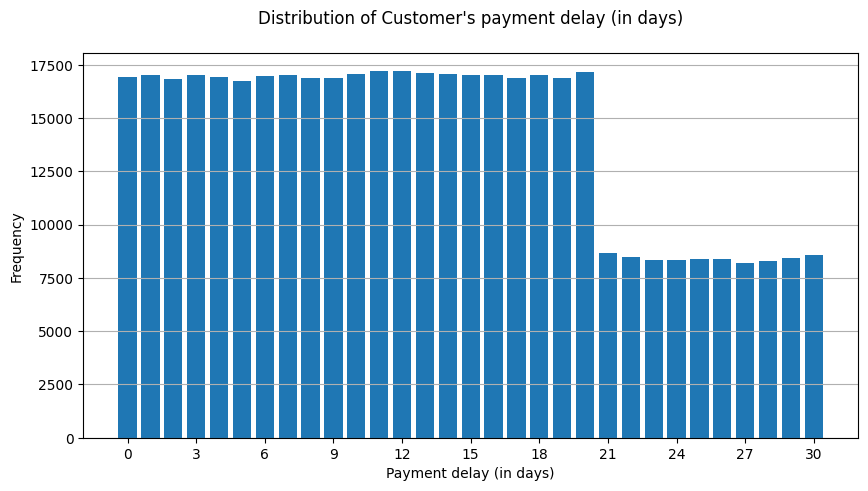

Distribution of Customer's payment delay (in days): 12.97 ± 12.00 days
Median: 12.00 days
Minimum: 0.0 days
Maximum: 30.0 days

0.267 Skewness



In [30]:
make_barplot(df, 'Payment Delay', custom_ticks=np.arange(0, 32, 3), unit='days', additional=' (in days)')



*   **On average,Customers tend to be 12 days late with their payments and also most of them still pay within 20 days.**




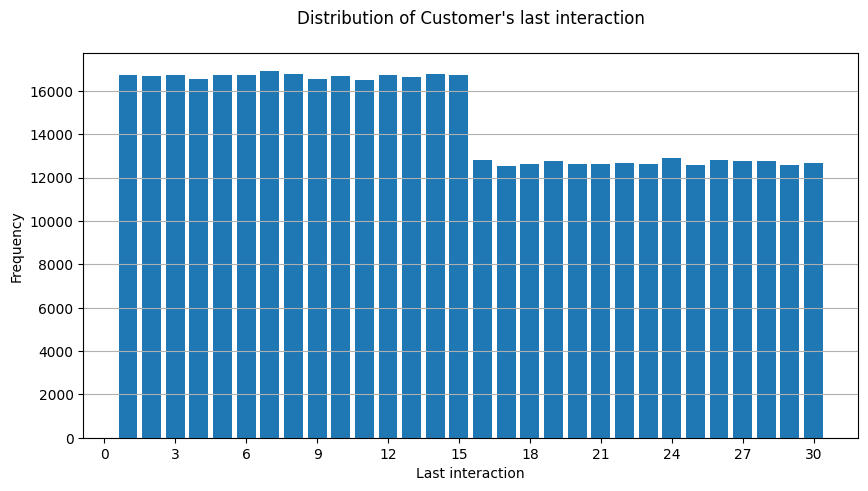

Distribution of Customer's last interaction: 14.48 ± 14.00 days
Median: 14.00 days
Minimum: 1.0 days
Maximum: 30.0 days

0.177 Skewness



In [31]:
make_barplot(df, 'Last Interaction', custom_ticks=np.arange(0, 32, 3), unit='days', additional='')




*   **Most customers tend to have 15 or less last interaction with average around 14 days.**




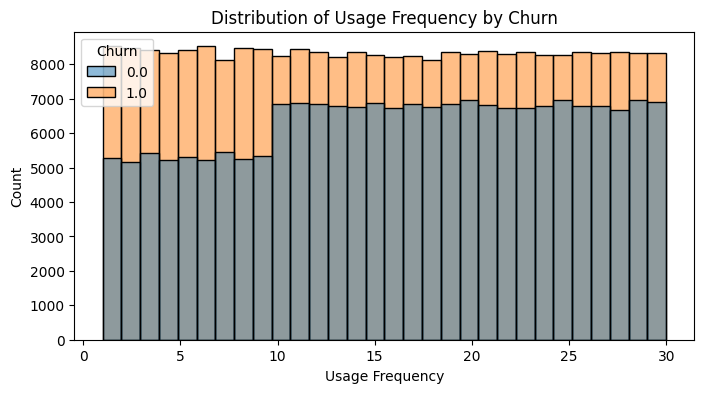

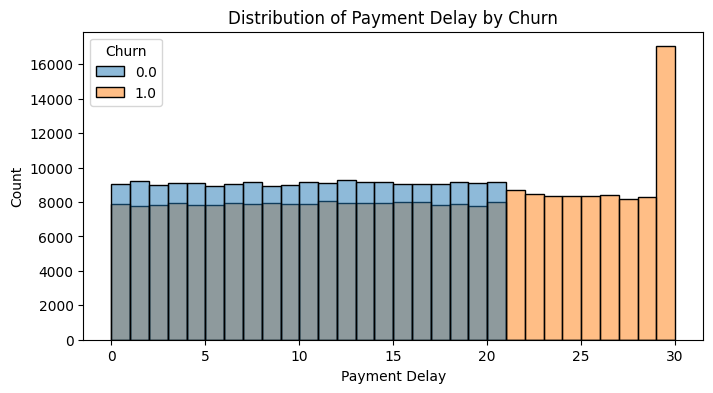

In [32]:

numerical_features = ['Usage Frequency','Payment Delay']
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=feature, hue='Churn', bins=30)
    plt.title(f'Distribution of {feature} by Churn')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()



*   **Churned customer tend to use company's services significantly more than customers who are not churned**


*   **Customers who stay with the company tend to be a bit slower with their payments compared to those who leave in the first 20 days. But after that period, the customers who leave actually have payments delayed by over 10 times more than those who stay.**







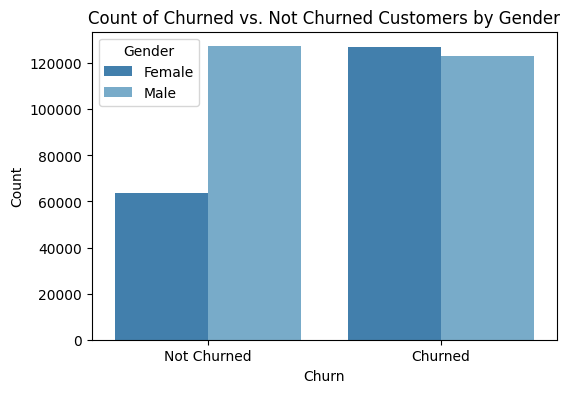

In [33]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', hue='Gender', data=df, palette='tab20c')
plt.title('Count of Churned vs. Not Churned Customers by Gender')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.legend(title='Gender')
plt.show()




*   **Female customers exhibit a slightly higher churn rate compared to male customers. Active male customers (non-churned) is nearly double that of female customers.**









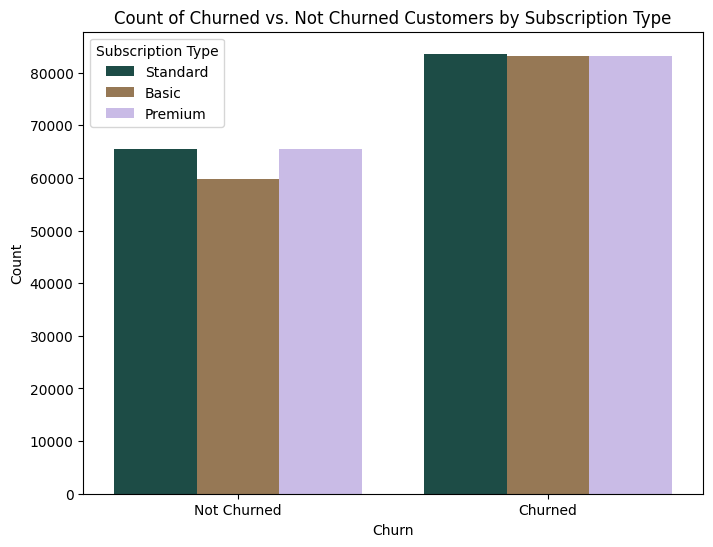

In [34]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.countplot(x='Churn', hue='Subscription Type', data=df, palette='cubehelix')
plt.title('Count of Churned vs. Not Churned Customers by Subscription Type')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Churned', 'Churned'])  # Optional: Rename x-axis labels
plt.legend(title='Subscription Type')
plt.show()



*   **The subscription type does not influence customer churn rate.**


*   **Customers who are not churned tend to choose premium or standard subscription type slightly more than basic subscription.**








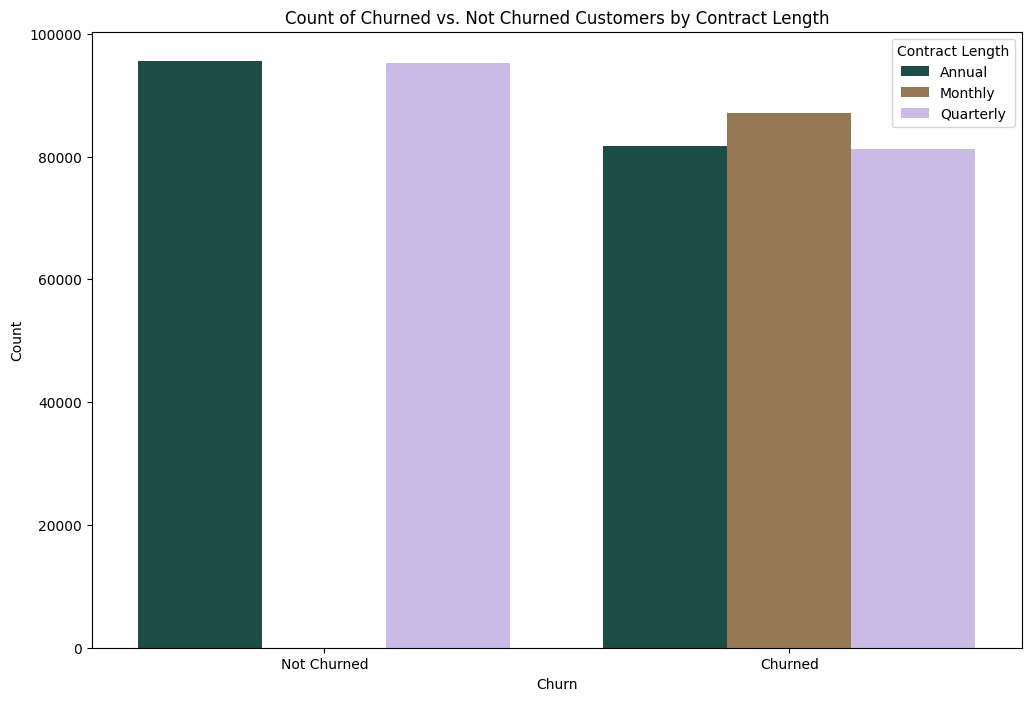

In [35]:
plt.figure(figsize=(12,8))
sns.countplot(x='Churn', hue='Contract Length', data=df, palette='cubehelix')
plt.title('Count of Churned vs. Not Churned Customers by Contract Length')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.legend(title='Contract Length')
plt.legend(title='Contract Length', loc='upper right', bbox_to_anchor=(1, 1))
plt.show()







*   **Annual and Quarterly contract have similar demand.**
*   **Monthly contract have much lower demand.**

*   **Clients with monthly contract length churned in 100% of cases**






/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning:

Vertical orientation ignored with only `x` specified.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning:

Vertical orientation ignored with only `x` specified.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning:

Vertical orientation ignored with only `x` specified.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning:

Vertical orientation ignored with only `x` specified.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning:

Vertical orientation ignored with only `x` specified.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning:

Vertical orientation ignored with only `x` specified.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning:

Vertical orientation ignored with only `x` specified.



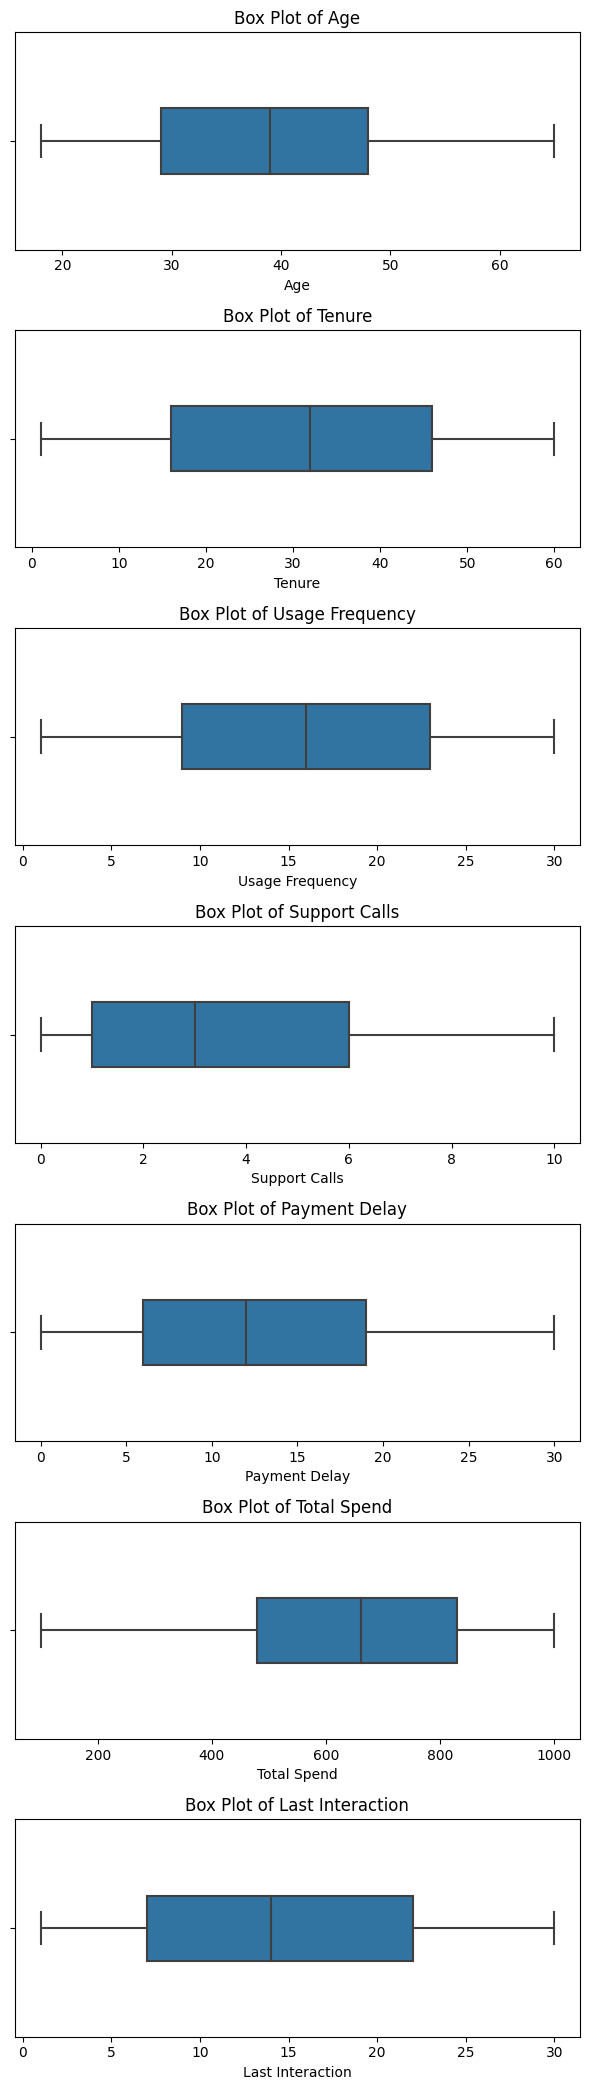

In [36]:
numerical_features = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend','Last Interaction']
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1, figsize=(6, 3 * len(numerical_features)))

for i, col in enumerate(numerical_features):
    sns.boxplot(x=col, data=df, orient='vertical', width=0.3, ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()



*   **From this it is clear that there is no outliers**

---






In [37]:
df.corr()

<ipython-input-37-2f6f6606aa2c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
Age,1.000000,-0.011630,-0.007190,0.158451,0.061738,-0.084684,0.028980,0.218394
Tenure,-0.011630,1.000000,-0.026800,-0.027640,-0.016588,0.019006,-0.006903,-0.051919
Usage Frequency,-0.007190,-0.026800,1.000000,-0.022013,-0.014470,0.018631,-0.004662,-0.046101
Support Calls,0.158451,-0.027640,-0.022013,1.000000,0.162889,-0.221594,0.077684,0.574267
Payment Delay,0.061738,-0.016588,-0.014470,0.162889,1.000000,-0.121044,0.042708,0.312129
Total Spend,-0.084684,0.019006,0.018631,-0.221594,-0.121044,1.000000,-0.056890,-0.429355
Last Interaction,0.028980,-0.006903,-0.004662,0.077684,0.042708,-0.056890,1.000000,0.149616
Churn,0.218394,-0.051919,-0.046101,0.574267,0.312129,-0.429355,0.149616,1.000000


<ipython-input-38-3b8c08843ae2>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



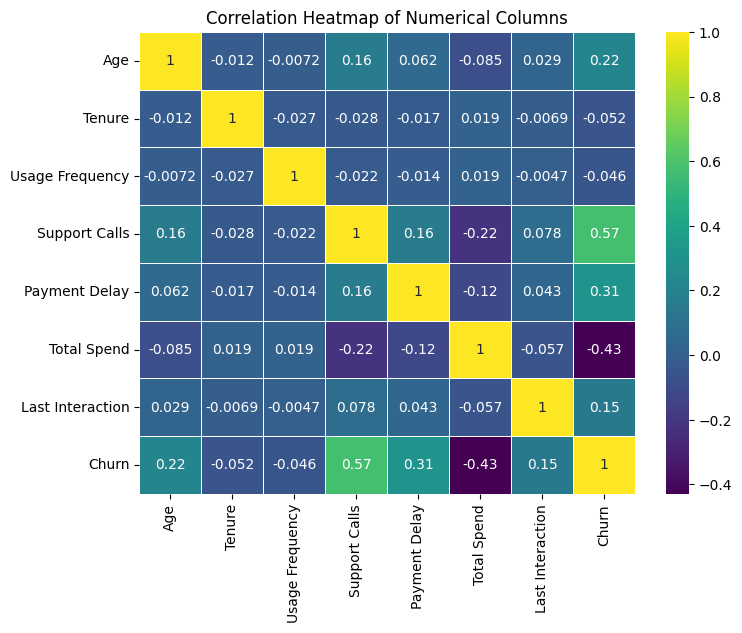

In [38]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(df.corr(),annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

In [39]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score




**ENCODING**

In [40]:
Ge=LabelEncoder()
Sub=LabelEncoder()
Cl=LabelEncoder()

In [41]:
df['Gender']=Ge.fit_transform(df['Gender'])
df['Subscription Type']=Sub.fit_transform(df['Subscription Type'])
df['Contract Length']=Cl.fit_transform(df['Contract Length'])

In [42]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.0,17.0,1.0
1,65.0,0,49.0,1.0,10.0,8.0,0,1,557.0,6.0,1.0
2,55.0,0,14.0,4.0,6.0,18.0,0,2,185.0,3.0,1.0
3,58.0,1,38.0,21.0,7.0,7.0,2,1,396.0,29.0,1.0
4,23.0,1,32.0,20.0,5.0,8.0,0,1,617.0,20.0,1.0


In [43]:
df.tail()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
440828,42.0,1,54.0,15.0,1.0,3.0,1,0,716.38,8.0,0.0
440829,25.0,0,8.0,13.0,1.0,20.0,1,0,745.38,2.0,0.0
440830,26.0,1,35.0,27.0,1.0,5.0,2,2,977.31,9.0,0.0
440831,28.0,1,55.0,14.0,2.0,0.0,2,2,602.55,2.0,0.0
440832,31.0,1,48.0,20.0,1.0,14.0,1,2,567.77,21.0,0.0


**SPLITTING DATA INTO INPUT AND OUTPUT LABELS**

In [44]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [45]:
x

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.00,17.0
1,65.0,0,49.0,1.0,10.0,8.0,0,1,557.00,6.0
2,55.0,0,14.0,4.0,6.0,18.0,0,2,185.00,3.0
3,58.0,1,38.0,21.0,7.0,7.0,2,1,396.00,29.0
4,23.0,1,32.0,20.0,5.0,8.0,0,1,617.00,20.0
...,...,...,...,...,...,...,...,...,...,...
440828,42.0,1,54.0,15.0,1.0,3.0,1,0,716.38,8.0
440829,25.0,0,8.0,13.0,1.0,20.0,1,0,745.38,2.0
440830,26.0,1,35.0,27.0,1.0,5.0,2,2,977.31,9.0
440831,28.0,1,55.0,14.0,2.0,0.0,2,2,602.55,2.0


In [46]:
y

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
440828    0.0
440829    0.0
440830    0.0
440831    0.0
440832    0.0
Name: Churn, Length: 440832, dtype: float64

**Over Sampling**

In [47]:
from imblearn.over_sampling import SMOTE

In [48]:
x_res,y_res = SMOTE().fit_resample(x,y)

In [49]:
y_res.value_counts()

1.0    249999
0.0    249999
Name: Churn, dtype: int64

**TRAIN DATA AND TEST DATA SPLIT**

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.3,random_state=42)

**FEATURE SCALING**

In [51]:
scaler= StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train

array([[-0.16489076,  0.88864749,  0.15171125, ..., -1.08759838,
         1.26726255, -0.7359551 ],
       [ 0.65915135, -1.1253056 , -0.25492832, ..., -1.08759838,
         0.48126378,  0.08147471],
       [ 0.08232188,  0.88864749,  1.02308176, ..., -1.08759838,
         0.982829  , -0.50240372],
       ...,
       [-0.16489076, -1.1253056 , -1.30057292, ...,  0.0314157 ,
         1.42046172, -0.7359551 ],
       [-0.4945076 ,  0.88864749, -0.25492832, ..., -1.08759838,
         0.75938511, -1.55338491],
       [ 0.9887682 , -1.1253056 ,  1.42972133, ..., -1.08759838,
         1.30104143,  0.54857746]])

In [52]:
print(x_train.shape)
print(y_train.shape)


(349998, 10)
(349998,)


**MODEL CREATION**

**1)Decision Tree Classifier**

In [53]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=4)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [54]:
print(accuracy_score(y_pred,y_test)*100)
print(precision_score(y_pred,y_test)*100)
print(classification_report(y_pred,y_test))


95.92133333333334
91.88030216534126
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96     80791
         1.0       0.92      1.00      0.96     69209

    accuracy                           0.96    150000
   macro avg       0.96      0.96      0.96    150000
weighted avg       0.96      0.96      0.96    150000



In [55]:
print(y_test.shape)
print(y_pred.shape)


(150000,)
(150000,)


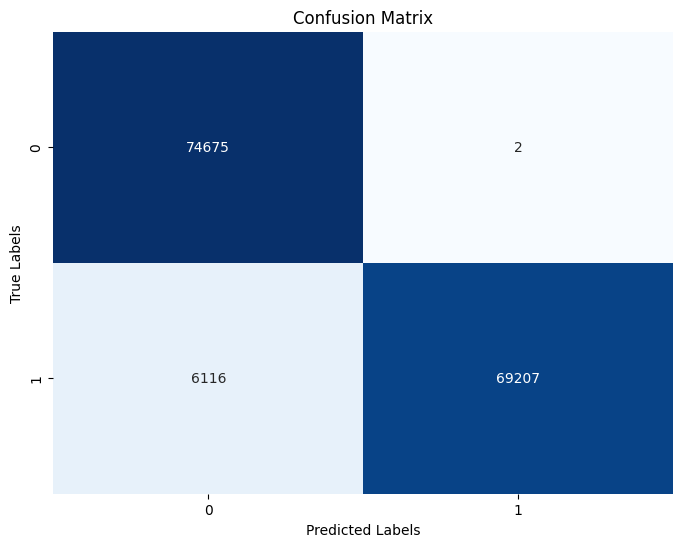

In [56]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

**2)Random Forest Classifier**

In [57]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred1=rf.predict(x_test)

In [58]:
print(accuracy_score(y_test,y_pred1)*100)
print(classification_report(y_test,y_pred1))

99.35133333333333
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     74677
         1.0       0.99      0.99      0.99     75323

    accuracy                           0.99    150000
   macro avg       0.99      0.99      0.99    150000
weighted avg       0.99      0.99      0.99    150000



<Figure size 800x600 with 0 Axes>

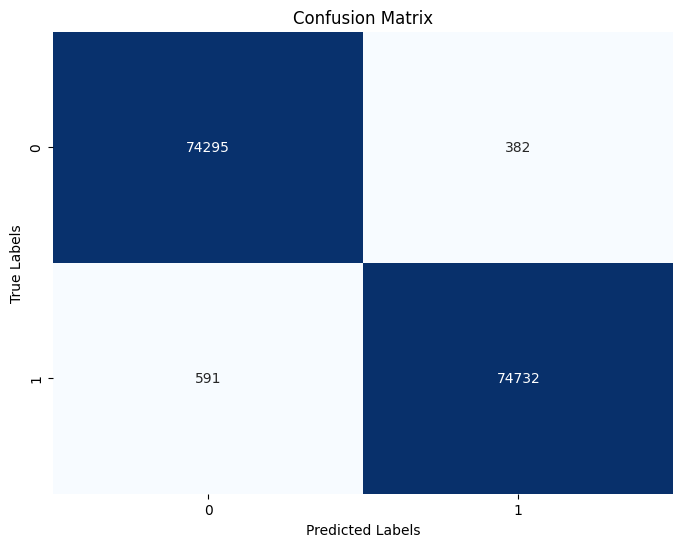

In [59]:
cm = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(8, 6))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

**3)KNeighbors Classifier**

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
knn = KNeighborsClassifier()

In [62]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [63]:
y_pred2 = knn.predict(x_test)

In [64]:
accuracy_score(y_test,y_pred2)*100
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     74677
         1.0       0.99      0.90      0.94     75323

    accuracy                           0.95    150000
   macro avg       0.95      0.95      0.95    150000
weighted avg       0.95      0.95      0.95    150000



<Figure size 800x600 with 0 Axes>

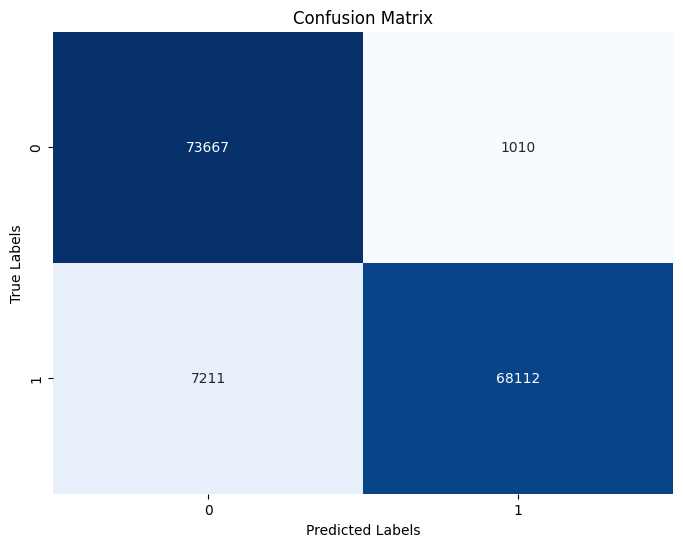

In [65]:
cm = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(8, 6))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [66]:
final_data = pd.DataFrame({'Models' : ['clf','rf','knn'],
                           'ACCURACY' : [accuracy_score(y_test,y_pred),
                                         accuracy_score(y_test,y_pred1),
                                         accuracy_score(y_test,y_pred2)]




})

In [67]:
print(final_data)

  Models  ACCURACY
0    clf  0.959213
1     rf  0.993513
2    knn  0.945193


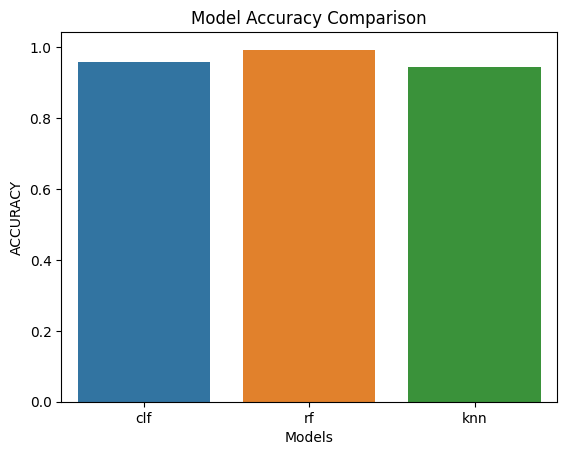

In [68]:
sns.barplot(x=final_data['Models'], y=final_data['ACCURACY'])
plt.xlabel('Models')
plt.ylabel('ACCURACY')
plt.title('Model Accuracy Comparison')
plt.show()

**Feature Importance Plot**

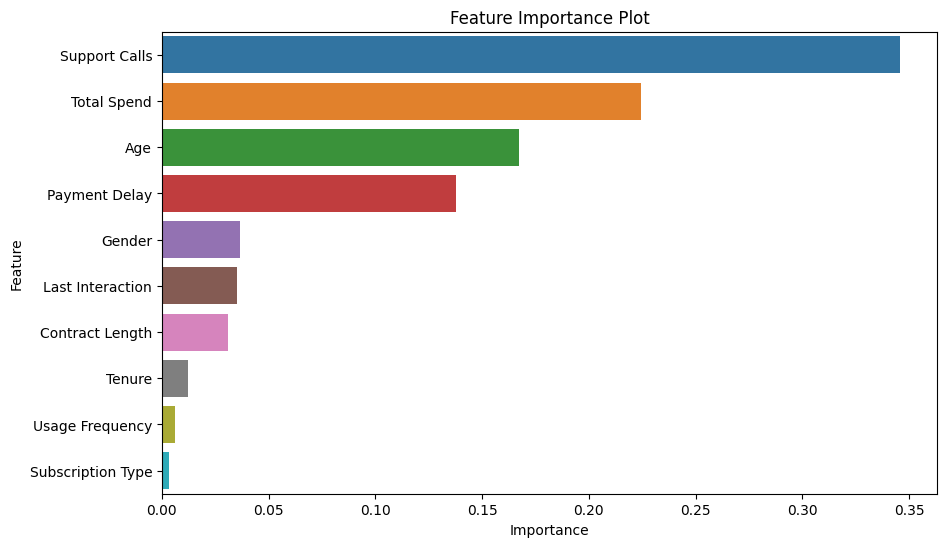

In [69]:
feature_importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': ['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend', 'Last Interaction'], 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance Plot')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



In [70]:
rf.score(x_test,y_test)


0.9935133333333334

In [71]:
rf.score(x_train,y_train)

1.0

**Conclusion:**

In this customer churn prediction project,I employed a Random Forest classifier to analyze and predict customer churn. Through rigorous data exploration, model training, and feature analysis,I have gained valuable insights into the factors influencing customer churn within this dataset.

**Key findings and conclusions are as follows:**

**1)Key Predictive Features:**

Our analysis revealed that several features play a significant role in
predicting customer churn. These features include:

*   Support Calls: The number of support calls made by customers has a strong positive correlation with churn. Customers who frequently contact support may be experiencing issues that affect their satisfaction.

*   Total Spend: Higher total spending by customers is associated with lower churn rates. This suggests that customers who invest more in our services are more likely to remain loyal.


*   Age: Age appears to be a relevant factor, with younger customers showing
 higher churn rates compared to older ones.


*   Payment Delay: Customers who experience payment delays are more likely to
churn. Timely and hassle-free payment processes are crucial  for customer retention.

*   Contract Length: Customers with longer contract durations tend to churn
less frequently. Longer commitments are indicative of stronger loyalty.

**2)Retention Strategies:**

Based on my findings, i recommend implementing targeted retention strategies to address the identified factors contributing to churn.
For instance, addressing issues related to support calls and payment delays can improve customer satisfaction and reduce churn.
Encouraging longer contract commitments and providing incentives for higher total spending can enhance customer loyalty.


**3)Continuous Monitoring:**

It's important to recognize that customer behavior and external factors may change over time. Therefore, we recommend ongoing monitoring and adaptation of retention strategies to ensure their effectiveness.

In conclusion, My churn prediction model and feature analysis have provided valuable insights into customer behavior and churn dynamics. By proactively addressing the identified factors and implementing targeted retention strategies, we can work towards reducing churn, enhancing customer satisfaction, and ultimately improving the long-term success of this business.